# Welcome to LineAART!

### Line-AART lets you numerically calculate the profile of relativisitcally broadened single frequency (i.e. line) emission from an axisymmetric equatorial thin-disk of emitters around a black hole. 

### This notebook is a walk through of how to use LineAART.

#### Line-AART calculates line profile via the following steps:
1) LensingBands: sets up a grid of points on the observer screen of a spacially resolved image of the disk. The program can calculate the n = 0, 1, and 2 images. The grid is in polar coordates on the observer screen. 
2) RayTrace: calculates the source radus for each observer screen pixel. 
3) Redshifts: calculates the redshift factor g=E_o/E_s (ratio of photon energy in observer and source frames) for each observer screen pixel. 
4) Intensities: calculates the intensity for each pixel on the observer screen. 
5) LineProfile: calculates line profiles as a histogram over the observer screen pixels.

#### Line-AART parameters. The Line-AART parameters are stored in the params.py file
**a**: BH spin in range (0,1) \
**i**: observer inclination in range \[0, pi/2) \
**sub_kep**: sub-Kepleniarity param [disk motion param] \
**betar**: radial velocity mixing param [disk motion param] \
**betaphi**: angular velocity param [disk motion param] \
**sigma**: disk emissivity fall off power [disk emission param] \
**r_0**: disk emissivity cut_off [disk emission param] \
**E_s**: energy of emission [disk emission param] \
**r_min**: minimum disk radius [disk geometry param] \
**r_max**: maximum disk radius [disk geometry param] \
**E_binwidth**: width of line profiles bins [line profile param] \
**limits**: maximum radial screen coordinate [observer screen param] \
**drho0, drho1, drho2**: compactified radial screen coordinate resolution for each lensing band n [observer screen params] \
**dvarphi0, dvarphi1, dvarphi2**: angular screen coordinates resolution for each lensing band n [observer screen params] \
**on_l0, on_l1, on_l2**: on/off = 0 or 1. image number n on which to calculate lensing bands \
**on_r0, on_r1, on_r2**: on/off = 0 or 1. image number n on which to calculate source radii \
**on_g0, on_g1, on_g2**: on/off = 0 or 1. image number n on which to calculate redshift factors, intensities, and line profiles \
**path**: the location of the saved data \
**comments**: on/off = 0 or 1. LineAART print out comments \

##### Note: 
1) emissivity function: $I(r) = ( r^{-\sigma} - r_0^{-\sigma} ) Heaviside(r_0 - r)$ \
2) compactified radial screen coordinate: $\rho_c(\rho) = 1 - \frac{1}{\rho + 1}$ \
3) parameters $r_{0}, r_{min}, r_{max}$ are in graviational radii

#### All above params can changed via edit_LineAART_params.py  in the params_run folder or manually
#### To reset a parameter x to the value y type "!python params_run/Edit_LineAART_params.py  --x=y"

### Line-AART can be run in two ways, via:
#### 1) in-line functions: These functions import params 12-18 in of params.py but ignore the values of params 1-11 in params.py and instead treats them as inputs.
- LensingBand(a, i) 
- RayTrace(a, i) 
- Redshifts(a, i, sub_kep, betar, betaphi) 
- Intensities(a, i, sub_kep, betar, betaphi, sigma, r_0) 
- LineProfile(a, i, sub_kep, betar, betaphi, sigma, r_0, E_s, r_min, r_max, E_binwidth) 
- RedshiftFactorsAndIntensities(a, i, sub_kep, betar, betaphi, sigma, r_0)  \[calculates redshifts & intensities simulaneously\]  

#### 2) xxx.py files: These functions import all of the params of params.py and are stored in the params_run folder.
- LensingBand.py 
- RayTrace.py 
- Redshifts.py 
- Intensities.py 
- LineProfile.py 
- RedshiftsAndIntensities.py 

### Line-AART output files in specific format labeled by the input parameters. We include functions to print out the outfile names in the file read_LineAART_files.py

#### File name functions:

- LBFile(on_l0, on_l1, on_l2, a, i, path)
- RayFile(on_r0, on_r1, on_r2, a, i, path)
- gFiles(on_g0, on_g1, on_g2, a, i, sub_kep, betar, betaphi, path)
- IFiles(on_g0, on_g1, on_g2, a, i, sub_kep, betar, betaphi, sigma_r, r_0, path)
- LineProfile(on_g0, on_g1, on_g2, a, i, sub_kep, betar, betaphi, sigma_r, r_0, r_min, r_max, E_s, E_binwidth, path)

#### Other useful functions in  read_LineAART_files.py

- rms(a): the prograde innermost stable ciruclar orbit (isco) 
- rh(a): the horizon
- rph(a): the prograde photon ciruclar orbit (pco)
- namedrad(r, a): function which returns 'isco', 'horizon', or 'pco' when r is rms(a), rh(a), or rph(a), respectively
- rho_comp(rho): compactified screen radius rho_c in \[0,1) as a function of screen radius rho in \[0,infinity)
- rho_comp_inv(rho_c): screen radius as a function of compactified screen radius

# Examples: A walk through running Line-AART with in-line functions (Part 1) and with params_run/xxx.py files (Part 2)

In [1]:
# create example directories if they do not already exist

import os

if not os.path.exists('Results_Examples_Part1'):
    os.makedirs('Results_Examples_Part1')
    print(f"Directory created.")
else:
    print(f"Directory already exists.")
    
if not os.path.exists('Results_Examples_Part2'):
    os.makedirs('Results_Examples_Part2')
    print(f"Directory created.")
else:
    print(f"Directory already exists.")


Directory already exists.
Directory already exists.


In [2]:
#prelims

# allow for reloading moduldes
%load_ext autoreload 
%autoreload 2

from read_LineAART_files import *  # The file read_LineAART_files.py contains the read in files
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Part 1: Line-AART with in-line functions

### Set Parameters

In [3]:
import subprocess
def Set_LineAART_Paramters(pathfile, limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2):
    cmd="python3 params_run/Edit_params.py --path=%s  --limits=%s --drho0=%s --dvarphi0=%s --drho1=%s --dvarphi1=%s --drho2=%s --dvarphi2=%s"%(pathfile, limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2)  
    return subprocess.run([cmd],shell=True);

In [4]:
# set results folder, screen size, radial and polar resolution

pathfile="./Results_Examples_Part1/"

limits = 15  # we want this image screen radius to be large enough to fit the whole disk
             # rule of thumb: for n=0 image, a disk with outer radius r_{out} larger than a ~10 
             #                will generally fit on a screen within screen radius about rho ~ r_{out}+1
             #                choosing limits ~ r_{out}+5 is reasonable 
             #                after ray tracing screen, we check to ensure we've capture the full disk

drho0 =.001
dvarphi0 = .001

drho1 = .001
dvarphi1 = .001

drho2 = .001
dvarphi2 = .001


Set_LineAART_Paramters(pathfile,limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2);


#set which bands are on for lensingbands.py, raytracing.py, and gfactor.py, respectively 
# here we turn them all on
!python3 params_run/Edit_params.py --on_l0=1 --on_l1=1 --on_l2=1 --on_r0=1 --on_r1=1 --on_r2=1 --on_g0=1 --on_g1=1 --on_g2=1

#Line-AART comments on
!python params_run/Edit_params.py --comments=1

params.py updated
params.py updated
params.py updated


In [5]:
from aart_func import * # The folder aart_func is the package all relevant libraries for the simulations
from params import * # The file params.py contains all the relevant parameters for the simulations


Thanks for using Line-AART


###### Note when running Line-AART when using in-line fuctions:
all parameters which are not NOT the function input params (a, i, sub_kep, beta_r, beta_phi, sigma, r_0, r_min, r_max, E_s, E_binwidth) need to be changed in BEFORE importing "params"

# Lensing Bands and Screen Pixels

##### set spin and inclinataion

In [6]:
a=.8
i=50

##### calculate lensing bands and observer screen pixels

In [7]:
%time LensingBands(a,i)

Computing Lensing Bands
Number of points in the n=0 grid 6284000
Number of points in the n=1 grid 6284000
Number of points in the n=2 grid 6284000
File  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5  created.
CPU times: user 1min 14s, sys: 4.47 s, total: 1min 19s
Wall time: 1min 19s


##### read in saved data

In [8]:
fnbands=LBFile(1,1,1,a,i,pathfile)
print("Reading file: ",fnbands)
h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow (i.e. critical curve) in cartesian coordiates
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#Points on edges of lensibands in cartesian coordiates
hulli_n=[h5f['hull_0i'][:],h5f['hull_1i'][:],h5f['hull_2i'][:]]
hulle_n=[h5f['hull_0e'][:],h5f['hull_1e'][:],h5f['hull_2e'][:]]

#Grid of pixels on screen
grid_n=[h5f['grid0'][:],h5f['grid1'][:],h5f['grid2'][:]]

#Map for pixels in lensingbands
mask_n=[h5f['mask0'][:],h5f['mask1'][:],h5f['mask2'][:]]

#Number of radii and angles includes in grid 
Nrho_n=[int(h5f["Nrho0"][0]),int(h5f["Nrho1"][0]),int(h5f["Nrho2"][0])]
Nvarphi_n=[int(h5f["Nvarphi0"][0]),int(h5f["Nvarphi1"][0]),int(h5f["Nvarphi2"][0])]

#Largest radus in grid
lim_n=[int(h5f["lim0"][0]),int(h5f["lim1"][0]),int(h5f["lim2"][0])]

h5f.close()

Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5


#####  plot lensing bands and screen pixels on cartesian grid
Line-AART creates a polar grid of points but here we plot the pixels in cartesian coordinates as a scatter plot

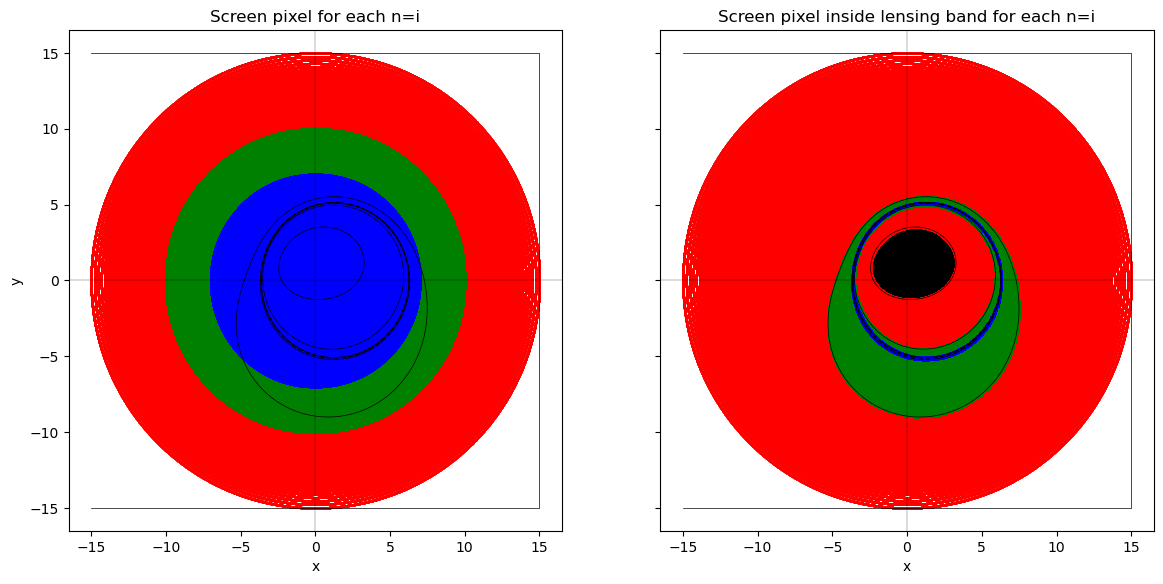

In [9]:
fig, ax = plt.subplots(1,2, sharex = True,sharey = True, figsize=[14,6.5])

colors=['r','g','b']
for jj in [0,1]:
    for n in [0,1,2]:
        ax[jj].plot(hulli_n[n][:,0],hulli_n[n][:,1],c="k",linewidth=0.5)
        ax[jj].plot(hulle_n[n][:,0],hulle_n[n][:,1],c="k",linewidth=0.5)

ax[0].set(ylabel='y')
for n in [0,1]:
    ax[n].set(xlabel='x')

    ax[n].axvline(0,color="k",linewidth=0.2)
    ax[n].axhline(0,color="k",linewidth=0.2)

    ax[n].plot(alpha_critc,beta_critc,color="k",linewidth=1,linestyle="--")
    ax[n].plot(alpha_critc,-beta_critc,color="k",linewidth=1,linestyle="--")

    ax[n].fill(hulli_n[0][:,0],hulli_n[0][:,1],color="k")

for n in [0,1,2]:
    ax[1].scatter(grid_n[n][:,0][mask_n[n]], grid_n[n][:,1][mask_n[n]],s=1,c=colors[n])
    ax[0].scatter(grid_n[n][:,0], grid_n[n][:,1], s=1,c=colors[n])

ax[0].set(title='Screen pixel for each n=i')
ax[1].set(title='Screen pixel inside lensing band for each n=i')


plt.show()

##### plotting diagnoistics for each lensing band

We plot on radially compactfied polar screen grid the compactified screen radius \bar{\rho}, angle \varphi, cartesian x, cartesian y

In [10]:
rho_crit = rho_comp(np.sqrt(alpha_critc**2 + beta_critc**2))
varphi_crit_plus = np.arctan2(beta_critc,alpha_critc)
varphi_crit_minus = np.arctan2(-beta_critc,alpha_critc)+2*np.pi

rho_n=[0,0,0]
varphi_n=[0,0,0]
lbi_rho=[0,0,0]
lbi_varphi=[0,0,0]
lbe_rho=[0,0,0]
lbe_varphi=[0,0,0]
drho_n=[0,0,0]
dvarphi_n=[0,0,0]
extent_n=[0,0,0]
for n in [0,1,2]:
    rho_n[n] = rho_comp(np.sqrt(grid_n[n][:,0]**2 + grid_n[n][:,1]**2))
    varphi_n[n] = np.mod(np.arctan2(grid_n[n][:,1], grid_n[n][:,0]),2*np.pi)
   
    lbi_rho[n] = rho_comp(np.sqrt(hulli_n[n][:,0]**2 + hulli_n[n][:,1]**2))
    lbi_rho[n]= np.concatenate((lbi_rho[n], lbi_rho[n]))
    lbi_varphi[n] =np.arctan2(hulli_n[n][:,1], hulli_n[n][:,0])
    lbi_varphi[n]= np.concatenate((lbi_varphi[n]+2*np.pi, lbi_varphi[n]))
    
    lbe_rho[n] = rho_comp(np.sqrt(hulle_n[n][:,0]**2 + hulle_n[n][:,1]**2))
    lbe_rho[n]= np.concatenate((lbe_rho[n], lbe_rho[n]))
    lbe_varphi[n] =np.arctan2(hulle_n[n][:,1], hulle_n[n][:,0])
    lbe_varphi[n]= np.concatenate((lbe_varphi[n]+2*np.pi, lbe_varphi[n]))
    
    drho_n[n]=rho_comp(lim_n[n])/Nrho_n[n]
    dvarphi_n[n]=2*np.pi/(Nrho_n[n])
    extent_n[n]=[drho_n[n], rho_comp(lim_n[n]), (3/4)*dvarphi_n[n], 2*np.pi-dvarphi_n[n]/4]

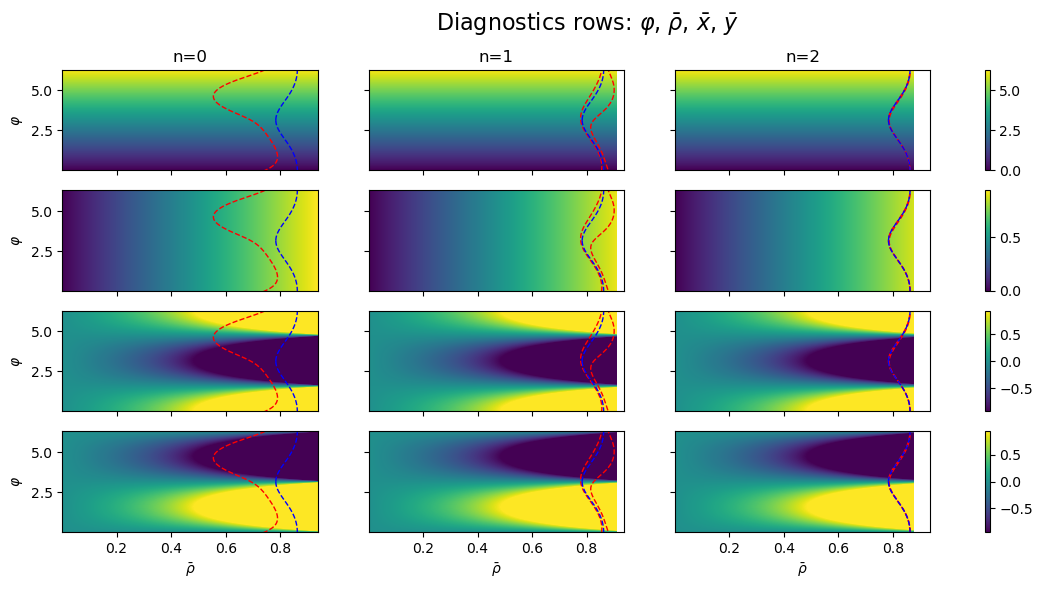

In [11]:
fig, ax = plt.subplots(4,3, sharex = True,sharey = True,figsize=[14,6])

for n in [2,1,0]:
    ax[0,n].set(title=r'n='+str(n)) 
    ax[3,n].set( xlabel=r'$\bar\rho$') 
    for jj in [0,1,2,3]:
        ax[jj,n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
        ax[jj,n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
        ax[jj,n].plot(rho_crit, varphi_crit_plus,color="b",linewidth=1,linestyle="--")
        ax[jj,n].plot(rho_crit, varphi_crit_minus,color="b",linewidth=1,linestyle="--")

im_n=[0,0,0,0]
for n in [2,1,0]:
    im_n[0]=ax[0,n].imshow(varphi_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=0, vmax=2*np.pi,aspect='auto')
    im_n[1]=ax[1,n].imshow(rho_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=0, vmax=rho_comp(lim_n[0]),aspect='auto')
    im_n[2]=ax[2,n].imshow(grid_n[n][:,0].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=-rho_comp(lim_n[0]), vmax=rho_comp(lim_n[0]),aspect='auto') 
    im_n[3]=ax[3,n].imshow(grid_n[n][:,1].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=-rho_comp(lim_n[0]), vmax=rho_comp(lim_n[0]),aspect='auto')
        
for jj in [0,1,2,3]:
    ax[jj,0].set(ylabel=r'$\varphi$')   

fig.colorbar(im_n[0], ax=ax[0, :])
fig.colorbar(im_n[1], ax=ax[1, :])
fig.colorbar(im_n[2], ax=ax[2, :])
fig.colorbar(im_n[3], ax=ax[3, :])

fig.suptitle(r'Diagnostics rows: $\varphi$, $\bar\rho$, $\bar{x}$, $\bar{y}$', fontsize=16)

plt.show()

#  Raytracing for Source radii

##### calculate source radii at each screen pixel

In [12]:
%time RayTrace(a,i)

Ray-tracing
Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5
Analytical ray-tracing for n=0, # of points 6284000
Analytical ray-tracing for n=1, # of points 6284000
Analytical ray-tracing for n=2, # of points 6284000
File  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5  created.
CPU times: user 3.39 s, sys: 699 ms, total: 4.09 s
Wall time: 4.17 s


##### read in saved data 

In [13]:
# read source radii
fnrays=RayFile(1,1,1,a,i,pathfile)
print("Reading file: ",fnrays)
h5f = h5py.File(fnrays,'r')

#source radius
rs_n=[h5f['rs0'][:],h5f['rs1'][:],h5f['rs2'][:]]
h5f.close()

Reading file:  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5


##### plot source radii

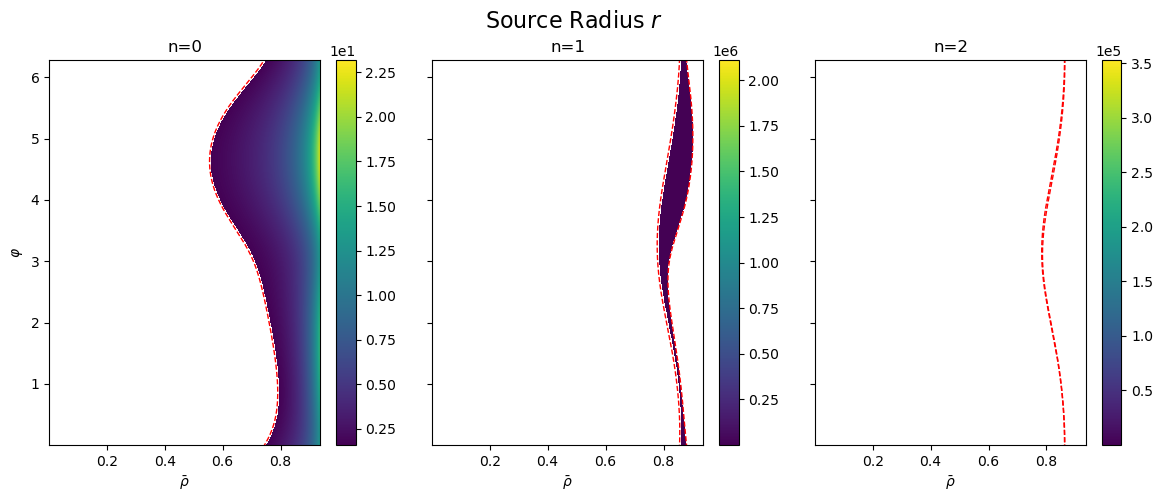

In [14]:
#plot
fig, ax = plt.subplots(1,3, sharex = True,sharey = True,figsize=[14,5])

for n in [2,1,0]:
    ax[n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im=ax[n].imshow(rs_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',aspect='auto')
    cbar=plt.colorbar(im, ax=ax[n],fraction=0.1)
    cbar.formatter.set_powerlimits((0, 0))
    ax[n].set(xlabel=r'$\bar{\rho}$',title='n='+str(n))
    
ax[0].set(ylabel=r'$\varphi$')

fig.suptitle(r'Source Radius $r$', fontsize=16)


plt.show()

#  Redshift factor and Intensity -- can be run via seperate functions or together

##### set disk parameters

In [15]:
SK=1.0
Br=1.0
Bphi=1.0

Sig=3
R0=np.inf

Es=6.4

rmin=rms(a)  # if you set in or outer radius to rms(a) the isco or rh(a) the horizon  
rmax=200 # the saved file will be label will be saved with tags 'isco' or 'horizon' instead of the number

Ebinwidth=.025

##### calculate redshift factors at each pixel
Reads in output of LensingBands and RayTrace \
Saves output in sub_folder labled by spin and inclination

In [16]:
%time Redshifts(a,i,SK,Br,Bphi)

Computing Redshift
Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5
Calculating redshift factors for n=0,  # of points 6284000
Calculating redshift factors for n=1,  # of points 6284000
Calculating redshift factors for n=2,  # of points 6284000
File  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5  created.
CPU times: user 390 ms, sys: 594 ms, total: 984 ms
Wall time: 1.03 s


##### calculate intensity at each pixel
Reads in output of LensingBands, RayTrace, RedshiftFactor \
Saves output in sub_folder labled by spin and inclination

In [17]:
%time Intensities(a,i,SK,Br,Bphi,Sig,R0)

Computing Intensity
Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5
Calculating intensity factors for n=0,  # of points 6284000
Calculating intensity factors for n=1,  # of points 6284000
Calculating intensity factors for n=2,  # of points 6284000
File  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5  created.
CPU times: user 67.4 ms, sys: 553 ms, total: 621 ms
Wall time: 666 ms


##### read in saved data

In [18]:
# read in redshifts
fngfacts = gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
print("Reading file: ",fngfacts)
h5f = h5py.File(fngfacts,'r')

# redshift factors
gf_n=[h5f['gf0'][:],h5f['gf1'][:],h5f['gf2'][:]]
h5f.close()

# read in intensities
fnginten = IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)
print("Reading file: ",fnginten)
h5f = h5py.File(fnginten,'r')

# intesity at each pixel in each lensing band
I_n=[h5f['Io0'][:],h5f['Io1'][:],h5f['Io2'][:]]
h5f.close()

Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5


##### plot redshift factors and intensities

Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5


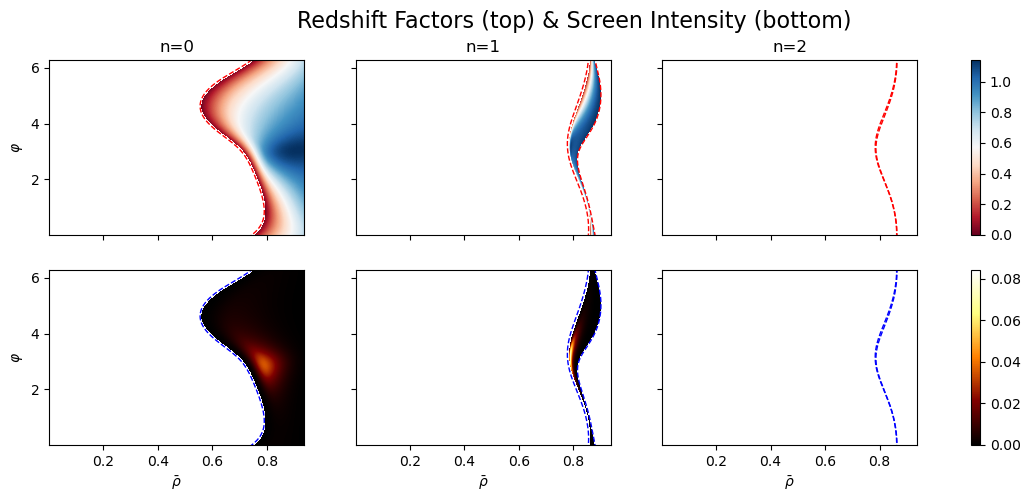

In [19]:
# reading redshift factors
fngfacts = gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
print("Reading file: ",fngfacts)
h5f = h5py.File(fngfacts,'r')
gf_n=[0,0,0]
gf_n=[h5f['gf0'][:],h5f['gf1'][:],h5f['gf2'][:]]
h5f.close()

# reading Intensities 
fnginten = IFile(1,1,1,a,i,SK,Br,Bphi,Sig,namedrad(R0,a),pathfile)
print("Reading file: ",fnginten)
h5f = h5py.File(fnginten,'r')
I_n=[0,0,0]
I_n=[h5f['Io0'][:],h5f['Io1'][:],h5f['Io2'][:]]
h5f.close()

#plot
fig, ax = plt.subplots(2,3, sharex = True,sharey = True, figsize=[14,5])

vmax=max([np.nanmax(gf_n[2][mask_n[2]]),np.nanmax(gf_n[1][mask_n[1]]),np.nanmax(gf_n[0][mask_n[0]])])
vmin=min([np.nanmin(gf_n[2][mask_n[2]]),np.nanmin(gf_n[1][mask_n[1]]),np.nanmin(gf_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[0,n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[0,n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im0=ax[0,n].imshow(gf_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap='RdBu',aspect='auto')
    ax[0,n].set(title='n='+str(n))
    
vmax=max([np.nanmax(I_n[2][mask_n[2]]),np.nanmax(I_n[1][mask_n[1]]),np.nanmax(I_n[0][mask_n[0]])])
vmin=min([np.nanmin(I_n[2][mask_n[2]]),np.nanmin(I_n[1][mask_n[1]]),np.nanmin(I_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[1,n].plot(lbi_rho[n], lbi_varphi[n],color="b",linewidth=1,linestyle="--")
    ax[1,n].plot(lbe_rho[n], lbe_varphi[n],color="b",linewidth=1,linestyle="--")
    im1=ax[1,n].imshow(I_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap="afmhot",vmin=vmin, vmax=vmax,aspect='auto')
    ax[1,n].set(xlabel=r'$\bar\rho$')
    
ax[0,0].set(ylabel=r'$\varphi$')
ax[1,0].set(ylabel=r'$\varphi$')
fig.colorbar(im0, ax=ax[0,:].ravel().tolist())
fig.colorbar(im1, ax=ax[1,:].ravel().tolist())
fig.suptitle(r'Redshift Factors (top) & Screen Intensity (bottom)', fontsize=16)

plt.show()

##  Intensity and redshift 

##### delete previously calculated RedshiftFactor and Intensities output
This is just for demonstration purposes. Any file already exisiting will just be written over if a function is rerun.

In [20]:
g_file=gFile(1,1,1,a,i,SK,Br,Bphi,path)
i_file= IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)

print(os.path.isfile(g_file),os.path.isfile(i_file))

os.remove(g_file)
os.remove(i_file)

print(os.path.isfile(g_file),os.path.isfile(i_file))

True True
False False


##### calculate redshift and  intensity at each pixel
Reads in output of LensingBands, RayTrace \
Saves outputs in sub_folder labled by spin and inclination

In [21]:
%time RedshiftsAndIntensities(a,i,SK,Br,Bphi,Sig,R0)

Computing Redshift and Intensity
Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5
Calculating redshift factors and intensities for n=0,  # of points 6284000
Calculating redshift factors and intensities for n=1,  # of points 6284000
Calculating redshift factors and intensities for n=2,  # of points 6284000
File  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5  created.
File  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5  created.
CPU times: user 385 ms, sys: 757 ms, total: 1.14 s
Wall time: 1.28 s


##### read in saved data and plot

Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5


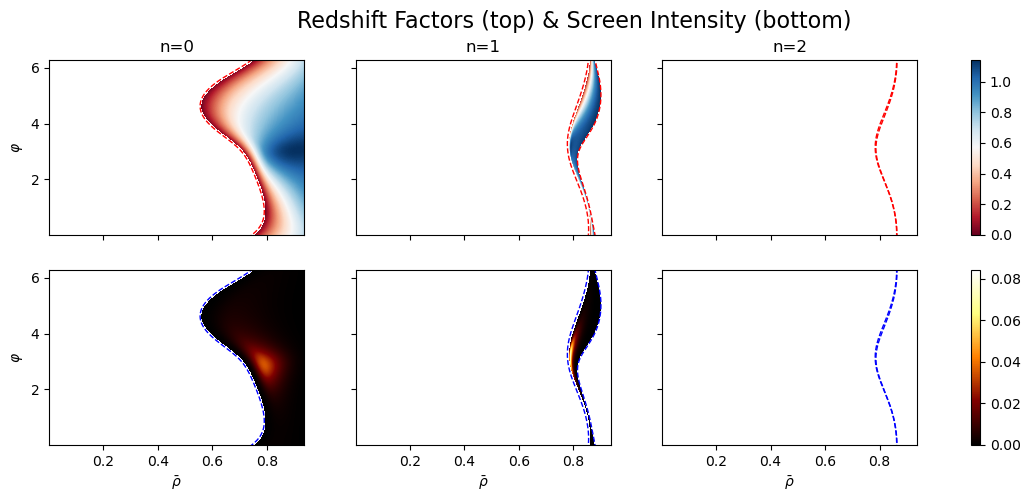

In [22]:
# reading redshift factors
fngfacts = gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
print("Reading file: ",fngfacts)
h5f = h5py.File(fngfacts,'r')
gf_n=[0,0,0]
gf_n=[h5f['gf0'][:],h5f['gf1'][:],h5f['gf2'][:]]
h5f.close()

# reading Intensities 
fnginten = IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)
print("Reading file: ",fnginten)
h5f = h5py.File(fnginten,'r')
I_n=[0,0,0]
I_n=[h5f['Io0'][:],h5f['Io1'][:],h5f['Io2'][:]]
h5f.close()

#plot
fig, ax = plt.subplots(2,3, sharex = True,sharey = True, figsize=[14,5])

vmax=max([np.nanmax(gf_n[2][mask_n[2]]),np.nanmax(gf_n[1][mask_n[1]]),np.nanmax(gf_n[0][mask_n[0]])])
vmin=min([np.nanmin(gf_n[2][mask_n[2]]),np.nanmin(gf_n[1][mask_n[1]]),np.nanmin(gf_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[0,n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[0,n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im0=ax[0,n].imshow(gf_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap='RdBu',aspect='auto')
    ax[0,n].set(title='n='+str(n))
    
vmax=max([np.nanmax(I_n[2][mask_n[2]]),np.nanmax(I_n[1][mask_n[1]]),np.nanmax(I_n[0][mask_n[0]])])
vmin=min([np.nanmin(I_n[2][mask_n[2]]),np.nanmin(I_n[1][mask_n[1]]),np.nanmin(I_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[1,n].plot(lbi_rho[n], lbi_varphi[n],color="b",linewidth=1,linestyle="--")
    ax[1,n].plot(lbe_rho[n], lbe_varphi[n],color="b",linewidth=1,linestyle="--")
    im1=ax[1,n].imshow(I_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap="afmhot",vmin=vmin, vmax=vmax,aspect='auto')
    ax[1,n].set(xlabel=r'$\bar\rho$')
    
ax[0,0].set(ylabel=r'$\varphi$')
ax[1,0].set(ylabel=r'$\varphi$')
fig.colorbar(im0, ax=ax[0,:].ravel().tolist())
fig.colorbar(im1, ax=ax[1,:].ravel().tolist())
fig.suptitle(r'Redshift Factors (top) & Screen Intensity (bottom)', fontsize=16)

plt.show()

# Line profile

##### check that the disk image to see which is the largest radius we have the full curve on image 
##### we will use this to set r_max 

In [23]:
temp=min((rs_n[0].reshape(Nrho_n[0], Nvarphi_n[0]))[-1,...])
temp

13.747410942450086

##### set disk edges, rest energy of emission, and binwidth for line profile
Line-AART has functions rms(a) the isco and rh(a) the horizon defined. if inner and/or outer radii are set to rms(a) or rh(a) the saved file will be label with tags 'horizon' or 'isco' instead of the numerical value, see below.

In [24]:
rmin=rms(a)   
rmax=int(np.floor(temp)) 
Es=6.4
Ebinwidth=.025

##### line profile as histogram summed over observer screen
Reads in output of LensingBands, RayTrace, RedshiftFactor, Intensities \
Saves outputs in sub_folder labled by spin and inclination

In [25]:
from aart_func import*
from params import*
from read_LineAART_files import*

In [26]:
%time LineProfile(a,i,SK,Br,Bphi,Sig,R0,Es,rmin,rmax,Ebinwidth)

Computing Line Profile
Reading file:  ./Results_Examples_Part1/LensingBands111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/Rays111_a_0.8_i_50.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/gfactors111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0.h5
Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/Intensities111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf.h5
File  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/LineProfile111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf_Es_6.4_rmin_isco_rmax_13.h5  created.
CPU times: user 220 ms, sys: 441 ms, total: 661 ms
Wall time: 688 ms


##### read in data

In [27]:
fnglp= LPFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,Es,rmin,rmax,pathfile)
print("Reading file: ",fnglp)

h5f = h5py.File(fnglp,'r')
lp_n=[0,0,0]
lp_n=[h5f['lp0'][:],h5f['lp1'][:],h5f['lp2'][:]]

E_bw=h5f['binwidth'][0]

h5f.close()

Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/LineProfile111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf_Es_6.4_rmin_isco_rmax_13.h5


##### plot line profile

Reading file:  ./Results_Examples_Part1/SpectraData111_a_0.8_i_50/LineProfile111_a_0.8_i_50_subkep_1.0_Br_1.0_Bphi_1.0_sig_3_r0_inf_Es_6.4_rmin_isco_rmax_13.h5


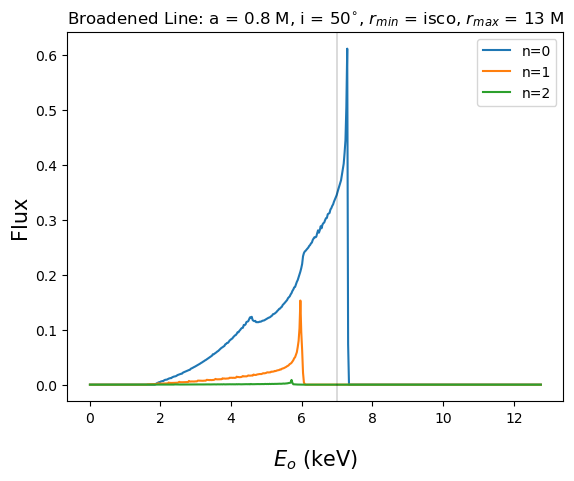

In [28]:
fnglp= LPFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,Es,rmin,rmax,pathfile)
print("Reading file: ",fnglp)

h5f = h5py.File(fnglp,'r')
lp_n=[0,0,0]
lp_n=[h5f['lp0'][:],h5f['lp1'][:],h5f['lp2'][:]]
E_bw=h5f['binwidth'][0]

h5f.close()


#plot
fig=plt.figure()

for n in [0,1,2]:
    plt.plot(lp_n[n][0],lp_n[n][1],label=r'n=%s'%(n))
    
    
# namedrad(rmin,a) is a function which Line-AART defines.  
# It returns 'isco' if rmin==rms(a), 'horizon' if rmin==rh(a), and rmin otherwise
plt.title(r'Broadened Line: a = %s M, i = %s$^{\circ}$, $r_{min}$ = %s, $r_{max}$ = %s M'%(a,i,namedrad(rmin,a),namedrad(rmax,a)), fontsize=12)
plt.xlabel(r'$E_{o}$ (keV)', fontsize=15, labelpad=16);
plt.ylabel("Flux", fontsize=15);
plt.axvline(E_s,color="k",linewidth=0.2)

plt.legend();

# Part 2: Line-AART with params_run/xxx.py files

### Set Parameters

In [29]:
import subprocess
def Set_AART_Paramters(pathfile,a,i,sk,br,bphi,alphar,rint0,Es,rmin,rmax,Ebw,limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2):    
    cmd="python3 params_run/Edit_params.py  --path=%s --a=%s --i=%s --subkep=%s --betar=%s --betaphi=%s --sigma=%s --r_0=%s --E_s=%s --r_min=%s --r_max=%s --E_binwidth=%s --limits=%s --drho0=%s --dvarphi0=%s --drho1=%s --dvarphi1=%s --drho2=%s --dvarphi2=%s"%(pathfile,a,i,sk,br,bphi,alphar,rint0,Es,rmin,rmax,Ebw,limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2)
    return subprocess.run([cmd],shell=True);

from aart_func import *

In [30]:
# set paramters

pathfile="./Results_Examples_Part2/"

a=.53
i=20

SK=.9
Br=.9
Bphi=.9

Sig=3
R0=200

Es=7

rmin=rms(a)  # if you set in or outer radius to rms(a) the isco or rh(a) the horizon  
rmax=R0      # the saved file will be label will be saved with tags 'horizon' or 'isco' instead of the number

Ebinwidth=.05

limits = 15

drho0 =.001
dvarphi0 = .001

drho1 = .001
dvarphi1 = .001

drho2 = .001
dvarphi2 = .001


Set_AART_Paramters(pathfile, a,i,SK,Br,Bphi,Sig,R0,Es,rmin,rmax,Ebinwidth,limits,drho0,dvarphi0,drho1,dvarphi1,drho2,dvarphi2);



#set which bands are on for lensingbands.py, raytracing.py, and gfactor.py, respectively
# we turn them all on
!python3 params_run/Edit_params.py --on_l0=1 --on_l1=1 --on_l2=1 --on_r0=1 --on_r1=1 --on_r2=1 --on_g0=1 --on_g1=1 --on_g2=1

params.py updated
params.py updated


# Lensing Bands and Screen Pixels

##### calculate lensing bands

In [31]:
%time !python3 params_run/LensingBands.py


Thanks for using Line-AART

Thanks for using Line-AART
Computing Lensing Bands
Number of points in the n=0 grid 6284000
Number of points in the n=1 grid 6284000
Number of points in the n=2 grid 6284000
File  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5  created.
CPU times: user 768 ms, sys: 142 ms, total: 910 ms
Wall time: 1min 22s


##### read in saved data; plot grid and lensing bands in cartesian coordinates

Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5


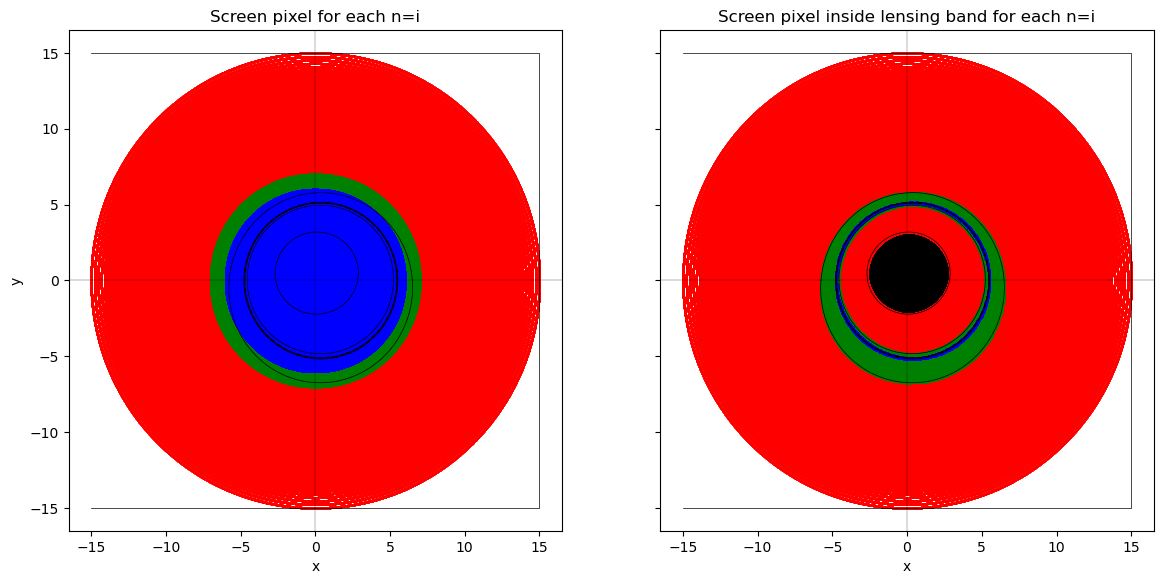

In [32]:
fnbands=LBFile(1,1,1,a,i,pathfile)
print("Reading file: ",fnbands)
h5f = h5py.File(fnbands,'r')

alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]
hulli_n=[h5f['hull_0i'][:],h5f['hull_1i'][:],h5f['hull_2i'][:]]
hulle_n=[h5f['hull_0e'][:],h5f['hull_1e'][:],h5f['hull_2e'][:]]
grid_n=[h5f['grid0'][:],h5f['grid1'][:],h5f['grid2'][:]]
Nrho_n=[int(h5f["Nrho0"][0]),int(h5f["Nrho1"][0]),int(h5f["Nrho2"][0])]
Nvarphi_n=[int(h5f["Nvarphi0"][0]),int(h5f["Nvarphi1"][0]),int(h5f["Nvarphi2"][0])]
mask_n=[h5f['mask0'][:],h5f['mask1'][:],h5f['mask2'][:]]
lim_n=[int(h5f["lim0"][0]),int(h5f["lim1"][0]),int(h5f["lim2"][0])]

h5f.close()

fig, ax = plt.subplots(1,2, sharex = True,sharey = True, figsize=[14,6.5])

colors=['r','g','b']
for jj in [0,1]:
    for n in [0,1,2]:
        ax[jj].plot(hulli_n[n][:,0],hulli_n[n][:,1],c="k",linewidth=0.5)
        ax[jj].plot(hulle_n[n][:,0],hulle_n[n][:,1],c="k",linewidth=0.5)

ax[0].set(ylabel='y')
for n in [0,1]:
    ax[n].set(xlabel='x')

    ax[n].axvline(0,color="k",linewidth=0.2)
    ax[n].axhline(0,color="k",linewidth=0.2)

    ax[n].plot(alpha_critc,beta_critc,color="k",linewidth=1,linestyle="--")
    ax[n].plot(alpha_critc,-beta_critc,color="k",linewidth=1,linestyle="--")

    ax[n].fill(hulli_n[0][:,0],hulli_n[0][:,1],color="k")

for n in [0,1,2]:
    ax[1].scatter(grid_n[n][:,0][mask_n[n]], grid_n[n][:,1][mask_n[n]],s=1,c=colors[n])
    ax[0].scatter(grid_n[n][:,0], grid_n[n][:,1], s=1,c=colors[n])

ax[0].set(title='Screen pixel for each n=i')
ax[1].set(title='Screen pixel inside lensing band for each n=i')


plt.show()

##### plot diagnoistics for each lensing band
We plot on radially compactfied polar screen grid the compactified screen radius \bar\rho, angle \varphi, cartesian \bar x, cartesian \bar y

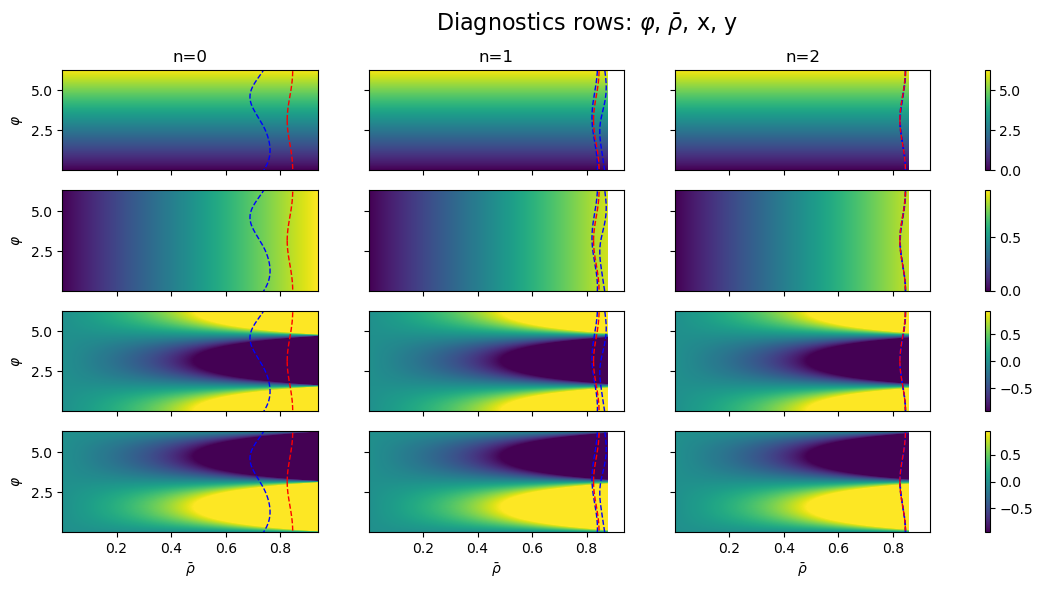

In [33]:
rho_crit = rho_comp(np.sqrt(alpha_critc**2 + beta_critc**2))
varphi_crit_plus = np.arctan2(beta_critc,alpha_critc)
varphi_crit_minus = np.arctan2(-beta_critc,alpha_critc)+2*np.pi

rho_n=[0,0,0]
varphi_n=[0,0,0]
lbi_rho=[0,0,0]
lbi_varphi=[0,0,0]
lbe_rho=[0,0,0]
lbe_varphi=[0,0,0]
drho_n=[0,0,0]
dvarphi_n=[0,0,0]
extent_n=[0,0,0]
for n in [0,1,2]:
    rho_n[n] = rho_comp(np.sqrt(grid_n[n][:,0]**2 + grid_n[n][:,1]**2))
    varphi_n[n] = np.mod(np.arctan2(grid_n[n][:,1], grid_n[n][:,0]),2*np.pi)
   
    lbi_rho[n] = rho_comp(np.sqrt(hulli_n[n][:,0]**2 + hulli_n[n][:,1]**2))
    lbi_rho[n]= np.concatenate((lbi_rho[n], lbi_rho[n]))
    lbi_varphi[n] =np.arctan2(hulli_n[n][:,1], hulli_n[n][:,0])
    lbi_varphi[n]= np.concatenate((lbi_varphi[n]+2*np.pi, lbi_varphi[n]))
    
    lbe_rho[n] = rho_comp(np.sqrt(hulle_n[n][:,0]**2 + hulle_n[n][:,1]**2))
    lbe_rho[n]= np.concatenate((lbe_rho[n], lbe_rho[n]))
    lbe_varphi[n] =np.arctan2(hulle_n[n][:,1], hulle_n[n][:,0])
    lbe_varphi[n]= np.concatenate((lbe_varphi[n]+2*np.pi, lbe_varphi[n]))
    
    drho_n[n]=rho_comp(lim_n[n])/Nrho_n[n]
    dvarphi_n[n]=2*np.pi/(Nrho_n[n])
    extent_n[n]=[drho_n[n], rho_comp(lim_n[n]), (3/4)*dvarphi_n[n], 2*np.pi-dvarphi_n[n]/4]
                       
    
fig, ax = plt.subplots(4,3, sharex = True,sharey = True,figsize=[14,6])

for n in [2,1,0]:
    ax[0,n].set(title=r'n='+str(n)) 
    ax[3,n].set( xlabel=r'$\bar\rho$') 
    for jj in [0,1,2,3]:
        ax[jj,n].plot(lbi_rho[n], lbi_varphi[n],color="b",linewidth=1,linestyle="--")
        ax[jj,n].plot(lbe_rho[n], lbe_varphi[n],color="b",linewidth=1,linestyle="--")
        ax[jj,n].plot(rho_crit, varphi_crit_plus,color="r",linewidth=1,linestyle="--")
        ax[jj,n].plot(rho_crit, varphi_crit_minus,color="r",linewidth=1,linestyle="--")

im_n=[0,0,0,0]
for n in [2,1,0]:
    im_n[0]=ax[0,n].imshow(varphi_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=0, vmax=2*np.pi,aspect='auto')
    im_n[1]=ax[1,n].imshow(rho_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=0, vmax=rho_comp(lim_n[0]),aspect='auto')
    im_n[2]=ax[2,n].imshow(grid_n[n][:,0].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=-rho_comp(lim_n[0]), vmax=rho_comp(lim_n[0]),aspect='auto') 
    im_n[3]=ax[3,n].imshow(grid_n[n][:,1].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',vmin=-rho_comp(lim_n[0]), vmax=rho_comp(lim_n[0]),aspect='auto')
        
for jj in [0,1,2,3]:
    ax[jj,0].set(ylabel=r'$\varphi$')   

fig.colorbar(im_n[0], ax=ax[0, :])
fig.colorbar(im_n[1], ax=ax[1, :])
fig.colorbar(im_n[2], ax=ax[2, :])
fig.colorbar(im_n[3], ax=ax[3, :])

fig.suptitle(r'Diagnostics rows: $\varphi$, $\bar\rho$, x, y', fontsize=16)

plt.show()

#  Raytracing for Source radii

##### calculate source radii

In [34]:
%time !python3 params_run/RayTrace.py


Thanks for using Line-AART
Ray-tracing
Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5
Analytical ray-tracing for n=0, # of points 6284000
Analytical ray-tracing for n=1, # of points 6284000
Analytical ray-tracing for n=2, # of points 6284000
File  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5  created.
CPU times: user 39.4 ms, sys: 28.5 ms, total: 67.8 ms
Wall time: 4.8 s


##### read in saved data and plot source radii

Reading file:  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5


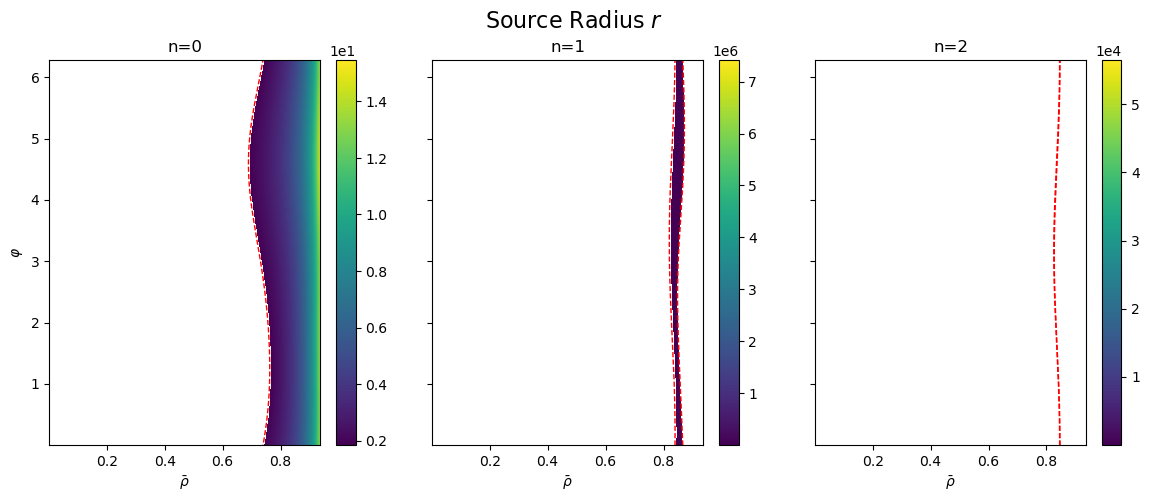

In [35]:
#read in data
fnrays=RayFile(1,1,1,a,i,pathfile)
print("Reading file: ",fnrays)
h5f = h5py.File(fnrays,'r')

rs_n=[h5f['rs0'][:],h5f['rs1'][:],h5f['rs2'][:]]
sign_n=[h5f['sign0'][:],h5f['sign1'][:],h5f['sign2'][:]]
h5f.close()

#plot
fig, ax = plt.subplots(1,3, sharex = True,sharey = True,figsize=[14,5])

for n in [2,1,0]:
    ax[n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im=ax[n].imshow(rs_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',aspect='auto')
    cbar=plt.colorbar(im, ax=ax[n],fraction=0.1)
    cbar.formatter.set_powerlimits((0, 0))
    ax[n].set(xlabel=r'$\bar{\rho}$',title='n='+str(n))
    
ax[0].set(ylabel=r'$\varphi$')

fig.suptitle(r'Source Radius $r$', fontsize=16)


plt.show()

#  Redshift factor and Intensity

##### calculate redshift factors and intesities

In [36]:
%time !python3 params_run/Redshifts.py
%time !python3 params_run/Intensities.py


Thanks for using Line-AART
Computing Redshift
Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5
Calculating redshift factors for n=0,  # of points 6284000
Calculating redshift factors for n=1,  # of points 6284000
Calculating redshift factors for n=2,  # of points 6284000
File  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5  created.
CPU times: user 8.62 ms, sys: 18.7 ms, total: 27.3 ms
Wall time: 1.63 s

Thanks for using Line-AART
Computing Intensity
Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5
Calculating intensity factors for n=0,  # of points 6284000
Calculating intensity factors for n=1,  # of points 6284000
Calculating intensity fac

##### read in saved data and plot 

Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5
Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/Intensities111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200.h5


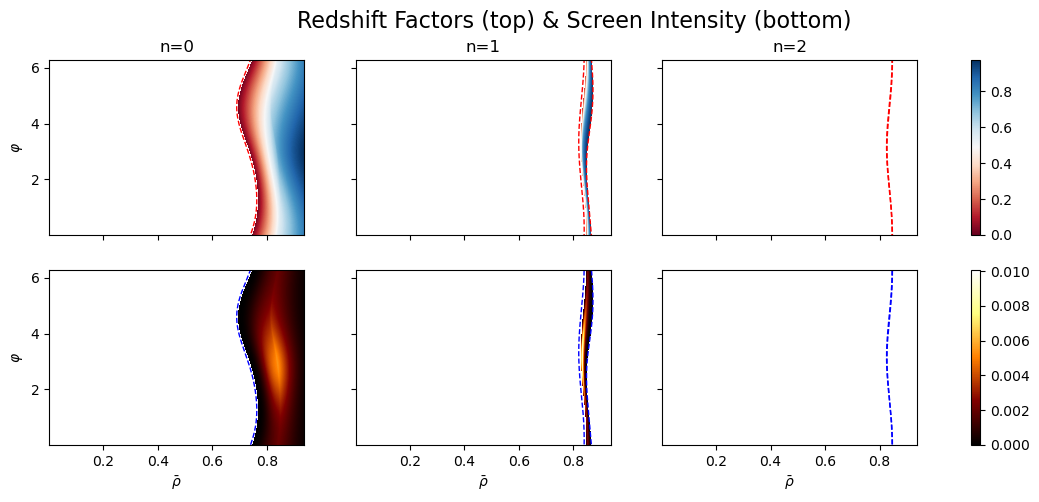

In [37]:
# reading redshift factors
fngfacts = gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
print("Reading file: ",fngfacts)
h5f = h5py.File(fngfacts,'r')
gf_n=[0,0,0]
gf_n=[h5f['gf0'][:],h5f['gf1'][:],h5f['gf2'][:]]
h5f.close()

# reading Intensities 
fnginten = IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)
print("Reading file: ",fnginten)
h5f = h5py.File(fnginten,'r')
I_n=[0,0,0]
I_n=[h5f['Io0'][:],h5f['Io1'][:],h5f['Io2'][:]]
h5f.close()

#plot
fig, ax = plt.subplots(2,3, sharex = True,sharey = True, figsize=[14,5])

vmax=max([np.nanmax(gf_n[2][mask_n[2]]),np.nanmax(gf_n[1][mask_n[1]]),np.nanmax(gf_n[0][mask_n[0]])])
vmin=min([np.nanmin(gf_n[2][mask_n[2]]),np.nanmin(gf_n[1][mask_n[1]]),np.nanmin(gf_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[0,n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[0,n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im0=ax[0,n].imshow(gf_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap='RdBu',aspect='auto')
    ax[0,n].set(title='n='+str(n))
    
vmax=max([np.nanmax(I_n[2][mask_n[2]]),np.nanmax(I_n[1][mask_n[1]]),np.nanmax(I_n[0][mask_n[0]])])
vmin=min([np.nanmin(I_n[2][mask_n[2]]),np.nanmin(I_n[1][mask_n[1]]),np.nanmin(I_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[1,n].plot(lbi_rho[n], lbi_varphi[n],color="b",linewidth=1,linestyle="--")
    ax[1,n].plot(lbe_rho[n], lbe_varphi[n],color="b",linewidth=1,linestyle="--")
    im1=ax[1,n].imshow(I_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap="afmhot",vmin=vmin, vmax=vmax,aspect='auto')
    ax[1,n].set(xlabel=r'$\bar\rho$')
    
ax[0,0].set(ylabel=r'$\varphi$')
ax[1,0].set(ylabel=r'$\varphi$')
fig.colorbar(im0, ax=ax[0,:].ravel().tolist())
fig.colorbar(im1, ax=ax[1,:].ravel().tolist())
fig.suptitle(r'Redshift Factors (top) & Screen Intensity (bottom)', fontsize=16)

plt.show()

##  Intensity and redshift 
Delete redshift factor and intensties just for demonstration; if functions are rerun, exisiting files will just be written over

In [38]:
g_file=gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
i_file= IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)

print(os.path.isfile(g_file),os.path.isfile(i_file))

os.remove(g_file)
os.remove(i_file)

print(os.path.isfile(g_file),os.path.isfile(i_file))

True True
False False


##### calculate intensity and redshift factor

In [39]:
%time !python3 params_run/RedshiftsAndIntensities.py


Thanks for using Line-AART
Computing Redshift and Intensity
Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5
Calculating redshift factors and intensities for n=0,  # of points 6284000
Calculating redshift factors and intensities for n=1,  # of points 6284000
Calculating redshift factors and intensities for n=2,  # of points 6284000
File  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5  created.
File  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/Intensities111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200.h5  created.
CPU times: user 14.3 ms, sys: 15.1 ms, total: 29.4 ms
Wall time: 1.81 s


##### read in saved data and plot

Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5
Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/Intensities111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200.h5


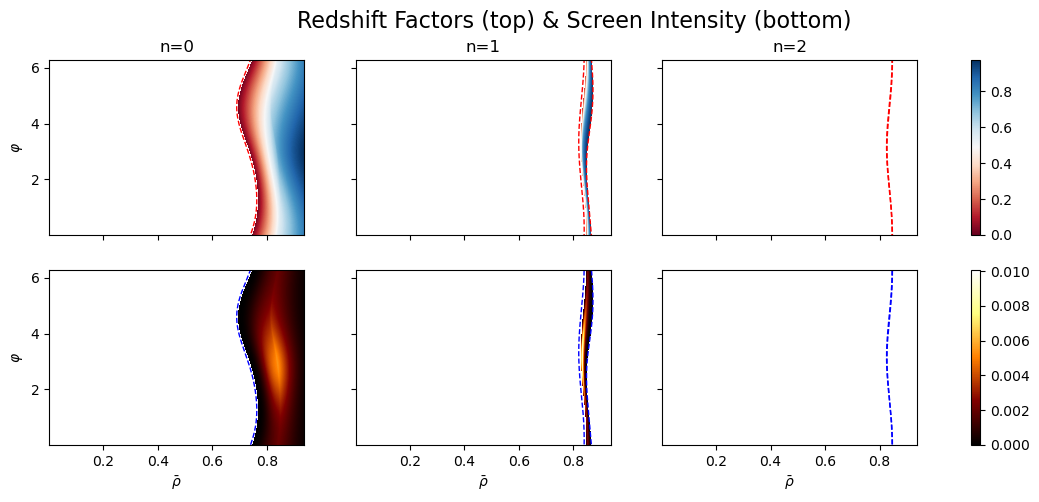

In [40]:
# reading redshift factors
fngfacts = gFile(1,1,1,a,i,SK,Br,Bphi,pathfile)
print("Reading file: ",fngfacts)
h5f = h5py.File(fngfacts,'r')
gf_n=[0,0,0]
gf_n=[h5f['gf0'][:],h5f['gf1'][:],h5f['gf2'][:]]
h5f.close()

# reading Intensities 
fnginten = IFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,pathfile)
print("Reading file: ",fnginten)
h5f = h5py.File(fnginten,'r')
I_n=[0,0,0]
I_n=[h5f['Io0'][:],h5f['Io1'][:],h5f['Io2'][:]]
h5f.close()

#plot
fig, ax = plt.subplots(2,3, sharex = True,sharey = True, figsize=[14,5])

vmax=max([np.nanmax(gf_n[2][mask_n[2]]),np.nanmax(gf_n[1][mask_n[1]]),np.nanmax(gf_n[0][mask_n[0]])])
vmin=min([np.nanmin(gf_n[2][mask_n[2]]),np.nanmin(gf_n[1][mask_n[1]]),np.nanmin(gf_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[0,n].plot(lbi_rho[n], lbi_varphi[n],color="r",linewidth=1,linestyle="--")
    ax[0,n].plot(lbe_rho[n], lbe_varphi[n],color="r",linewidth=1,linestyle="--")
    im0=ax[0,n].imshow(gf_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap='RdBu',aspect='auto')
    ax[0,n].set(title='n='+str(n))
    
vmax=max([np.nanmax(I_n[2][mask_n[2]]),np.nanmax(I_n[1][mask_n[1]]),np.nanmax(I_n[0][mask_n[0]])])
vmin=min([np.nanmin(I_n[2][mask_n[2]]),np.nanmin(I_n[1][mask_n[1]]),np.nanmin(I_n[0][mask_n[0]])])

for n in [2,1,0]:
    ax[1,n].plot(lbi_rho[n], lbi_varphi[n],color="b",linewidth=1,linestyle="--")
    ax[1,n].plot(lbe_rho[n], lbe_varphi[n],color="b",linewidth=1,linestyle="--")
    im1=ax[1,n].imshow(I_n[n].reshape(Nrho_n[n], Nvarphi_n[n]).T, extent=extent_n[n],origin='lower',cmap="afmhot",vmin=vmin, vmax=vmax,aspect='auto')
    ax[1,n].set(xlabel=r'$\bar\rho$')
    
ax[0,0].set(ylabel=r'$\varphi$')
ax[1,0].set(ylabel=r'$\varphi$')
fig.colorbar(im0, ax=ax[0,:].ravel().tolist())
fig.colorbar(im1, ax=ax[1,:].ravel().tolist())
fig.suptitle(r'Redshift Factors (top) & Screen Intensity (bottom)', fontsize=16)

plt.show()

# Line profile

##### calculate line profile

In [41]:
%time !python3 params_run/LineProfile.py


Thanks for using Line-AART
Computing Line Profile
Reading file:  ./Results_Examples_Part2/LensingBands111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/Rays111_a_0.53_i_20.h5
Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/gfactors111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9.h5
Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/Intensities111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200.h5
File  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/LineProfile111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200_Es_7_rmin_isco_rmax_200.h5  created.
CPU times: user 9.95 ms, sys: 14.1 ms, total: 24 ms
Wall time: 1.43 s


##### read in data; plot line profile

Reading file:  ./Results_Examples_Part2/SpectraData111_a_0.53_i_20/LineProfile111_a_0.53_i_20_subkep_0.9_Br_0.9_Bphi_0.9_sig_3_r0_200_Es_7_rmin_isco_rmax_200.h5


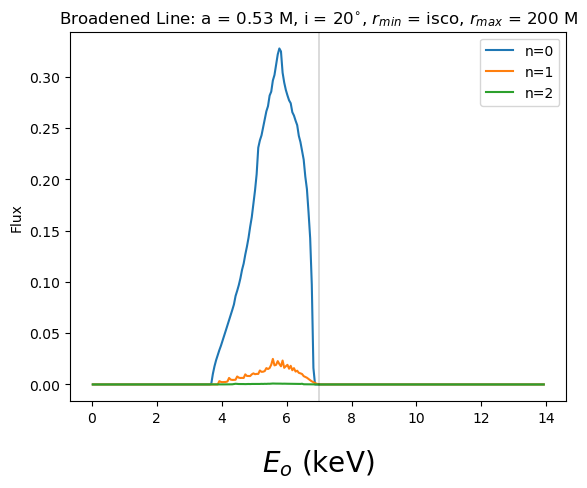

In [42]:
fnglp= LPFile(1,1,1,a,i,SK,Br,Bphi,Sig,R0,Es,rmin,rmax,pathfile)
print("Reading file: ",fnglp)

h5f = h5py.File(fnglp,'r')
lp_n=[0,0,0]
lp_n=[h5f['lp0'][:],h5f['lp1'][:],h5f['lp2'][:]]
E_bw=h5f['binwidth'][0]

h5f.close()


#plot
fig=plt.figure()

for n in [0,1,2]:
    plt.plot(lp_n[n][0],lp_n[n][1],label=r'n=%s'%(n))
    
    
# namedrad(rmin,a) is a function which read_Line-AART_files.py defines.  
# It returns 'isco' if rmin==rms(a), 'horizon' if rmin==rh(a), and rmin otherwise
plt.title(r'Broadened Line: a = %s M, i = %s$^{\circ}$, $r_{min}$ = %s, $r_{max}$ = %s M'%(a,i,namedrad(rmin,a),namedrad(rmax,a)), fontsize=12)
plt.xlabel(r'$E_{o}$ (keV)', fontsize=20, labelpad=16);
plt.ylabel("Flux", fontsize=10);
plt.axvline(Es,color="k",linewidth=0.2)

plt.legend();

# Thank you for using LineAART!